In [1]:
import os
import sys
from pathlib import Path

import torch
import torchio
import matplotlib.pyplot as plt

sys.path.append('..')

from src.utils import remove_legs
from src.visualisation import PatientSnapshot

In [2]:
data_dir = Path('../data/')
paths = [data_dir/p for p in ['1', '2', '3']]


subjects = []
for image_path in paths:
    subject = torchio.Subject(
        torchio.Image('snapshot', image_path, torchio.INTENSITY),
#         torchio.Image('mask', label_path, torchio.LABEL),
    )
    subjects.append(subject)


dataset = torchio.ImagesDataset(subjects)

In [3]:
def show_transform(original_sample, transform=None):
    if transform:
        print(transform.__class__)
        sample = transform(original_sample)
    else:
        print('Original')
        sample = original_sample
        
    p = PatientSnapshot.from_torchio(sample)
    p.horizontal_plot(z=200, vmin=-1000, vmax=500)

Original


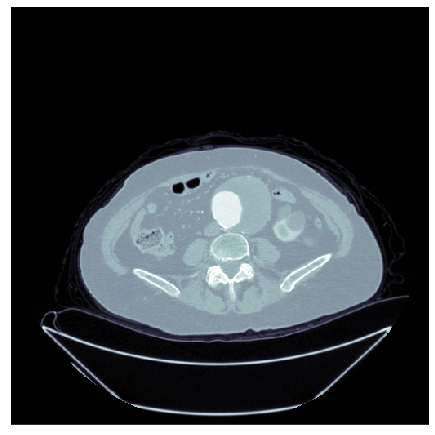

In [4]:
original_sample = dataset[0]

# Remove legs for faster processing
temp = original_sample['snapshot']['data'].numpy()[0].transpose()
wo_legs = torch.from_numpy(
    remove_legs(temp).transpose()
).unsqueeze(0)
original_sample['snapshot']['data'] = wo_legs

show_transform(original_sample)

<class 'torchio.transforms.augmentation.spatial.random_elastic_deformation.RandomElasticDeformation'>
CPU times: user 7min 45s, sys: 2.62 s, total: 7min 48s
Wall time: 2min 11s


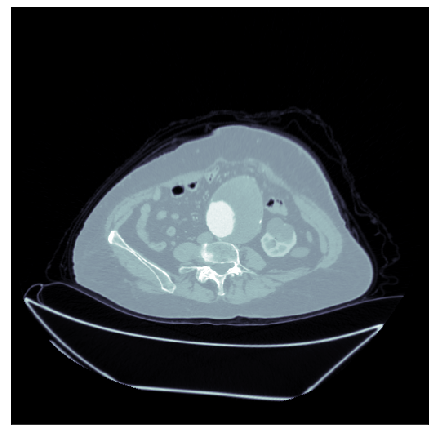

In [5]:
%%time

transform = torchio.transforms.RandomElasticDeformation(deformation_std=150)
show_transform(original_sample, transform)

<class 'torchio.transforms.augmentation.intensity.random_noise.RandomNoise'>
CPU times: user 3.34 s, sys: 585 ms, total: 3.92 s
Wall time: 3.99 s


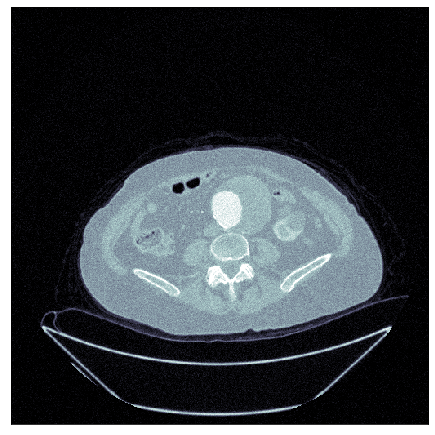

In [6]:
%%time

transform = torchio.transforms.RandomNoise(std_range=(50, 100))
show_transform(original_sample, transform)

<class 'torchio.transforms.augmentation.intensity.random_blur.RandomBlur'>
CPU times: user 33.8 s, sys: 1.09 s, total: 34.8 s
Wall time: 13.3 s


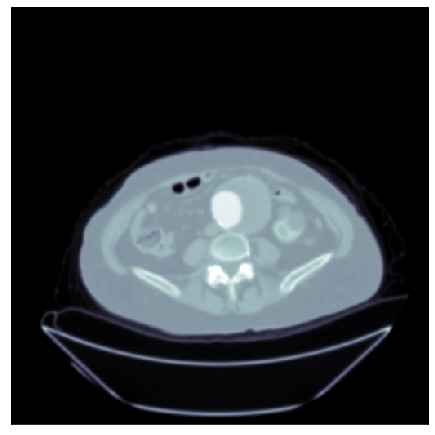

In [7]:
%%time

transform = torchio.transforms.RandomBlur(std_range=(1, 4))
show_transform(original_sample, transform)

<class 'torchio.transforms.augmentation.spatial.random_flip.RandomFlip'>
CPU times: user 17.9 s, sys: 390 ms, total: 18.3 s
Wall time: 18.4 s


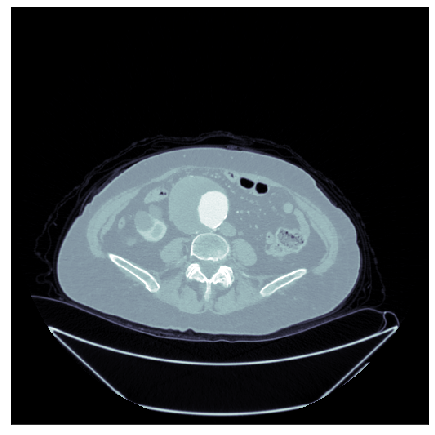

In [10]:
%%time

transform = torchio.transforms.RandomFlip(
    axes=(0,),
    flip_probability=1,
)
show_transform(original_sample, transform)

<class 'torchio.transforms.augmentation.spatial.random_affine.RandomAffine'>
CPU times: user 9.72 s, sys: 940 ms, total: 10.7 s
Wall time: 5.78 s


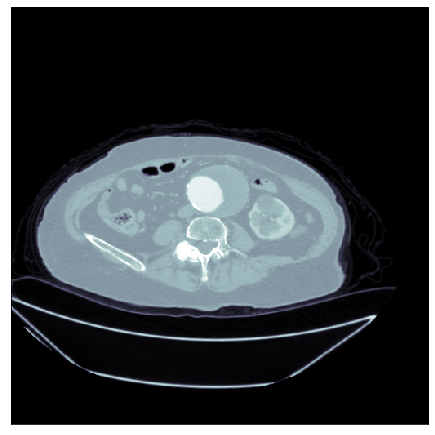

In [11]:
%%time

transform = torchio.transforms.RandomAffine(
    scales=(0.9, 1.1),
    degrees=10,
    isotropic=False,
)
show_transform(original_sample, transform)